In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [44]:
bike_sharing_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
bike_sharing_data.shape

(730, 16)

In [46]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [47]:
bike_sharing_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [48]:
# Data Cleaning
# 1. instant: This is nothing but record index. We can drop this value from our analysys.
# 2. We have Season represented by 1,2,3, & 4
# Mapping these veriable into dummy variabled in the dataframe.
# 3. Yr Column - Again map these into dummy variables
# 4. Month Column to be converted in Dummy variable
# 5. Convert the day column in Monday to Sunday (Another Dummy variable)
# 6. After converting the date colun, we can drop the date.
# 7. weathersit - to be converted in our own category

unnecessary_columns_set_1 = ['instant', 'dteday', 'dteday', 'casual', 'registered']
bike_sharing_data.drop(unnecessary_columns_set_1, axis=1, inplace=True)

In [49]:
bike_sharing_data.shape

(730, 12)

In [50]:
conditions = [
    (bike_sharing_data['season'] == 1),
    (bike_sharing_data['season'] == 2),
    (bike_sharing_data['season'] == 3),
    (bike_sharing_data['season'] == 4)
]

values = ['spring', 'summer', 'fall', 'winter']
bike_sharing_data['season_name'] = np.select(conditions, values)

conditions = [
    (bike_sharing_data['yr'] == 0),
    (bike_sharing_data['yr'] == 1)
]

values = ['year_2018', 'year_2019']
bike_sharing_data['year_name'] = np.select(conditions, values)

conditions = [
    (bike_sharing_data['mnth'] == 1),
    (bike_sharing_data['mnth'] == 2),
    (bike_sharing_data['mnth'] == 3),
    (bike_sharing_data['mnth'] == 4),
    (bike_sharing_data['mnth'] == 5),
    (bike_sharing_data['mnth'] == 6),
    (bike_sharing_data['mnth'] == 7),
    (bike_sharing_data['mnth'] == 8),
    (bike_sharing_data['mnth'] == 9),
    (bike_sharing_data['mnth'] == 10),
    (bike_sharing_data['mnth'] == 11),
    (bike_sharing_data['mnth'] == 12),
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bike_sharing_data['month_name'] = np.select(conditions, values)

conditions = [
    (bike_sharing_data['weekday'] == 0),
    (bike_sharing_data['weekday'] == 1),
    (bike_sharing_data['weekday'] == 2),
    (bike_sharing_data['weekday'] == 3),
    (bike_sharing_data['weekday'] == 4),
    (bike_sharing_data['weekday'] == 5),
    (bike_sharing_data['weekday'] == 6)
]
values = ['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','Monday']
bike_sharing_data['day_name'] = np.select(conditions, values)
bike_sharing_data.head()

# Convert Corking and Nonworking day
conditions = [
    (bike_sharing_data['workingday'] == 0),
    (bike_sharing_data['workingday'] == 1)
]

values = ['holiday', 'working_day']
bike_sharing_data['day_type'] = np.select(conditions, values)

# Create custom categories based on the veriable - weathersit
conditions = [
    (bike_sharing_data['weathersit'] == 1),
    (bike_sharing_data['weathersit'] == 2),
    (bike_sharing_data['weathersit'] == 3),
    (bike_sharing_data['weathersit'] == 4),
]

values = ['Clear_Partly_cloudy', 'Mist_Broken_Few_Clouds', 'Light_Snow_Rain_Thunderstorm_Scattered clouds', 'Heavy_Rain_Ice_Pallets_Thunderstorm_Snow_Fog']
bike_sharing_data['weather_situation'] = np.select(conditions, values)

In [13]:
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['season_name'])
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['year_name'])
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['month_name'])
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['day_name'])
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['day_type'])
# bike_sharing_data = pd.get_dummies(bike_sharing_data, columns=['weather_situation'])

In [51]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    int64  
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    int64  
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    int64  
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  season_name        730 non-null    object 
 13  year_name          730 non-null    object 
 14  month_name         730 non-null    object 
 15  day_name           730 non-null    object 
 16  day_type           730 non

In [52]:
bike_sharing_data.info()
# sns.pairplot(data=bike_sharing_data, x_vars=('TV', 'Radio', 'Newspaper'), y_vars=('cnt'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   mnth               730 non-null    int64  
 3   holiday            730 non-null    int64  
 4   weekday            730 non-null    int64  
 5   workingday         730 non-null    int64  
 6   weathersit         730 non-null    int64  
 7   temp               730 non-null    float64
 8   atemp              730 non-null    float64
 9   hum                730 non-null    float64
 10  windspeed          730 non-null    float64
 11  cnt                730 non-null    int64  
 12  season_name        730 non-null    object 
 13  year_name          730 non-null    object 
 14  month_name         730 non-null    object 
 15  day_name           730 non-null    object 
 16  day_type           730 non

In [53]:
bike_sharing_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_name,year_name,month_name,day_name,day_type,weather_situation
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,year_2018,Jan,Monday,holiday,Mist_Broken_Few_Clouds
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,year_2018,Jan,Tuesday,holiday,Mist_Broken_Few_Clouds
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,year_2018,Jan,Wednesday,working_day,Clear_Partly_cloudy
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,year_2018,Jan,Thursday,working_day,Clear_Partly_cloudy
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,year_2018,Jan,Friday,working_day,Clear_Partly_cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,spring,year_2019,Dec,Saturday,working_day,Mist_Broken_Few_Clouds
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,spring,year_2019,Dec,Sunday,working_day,Mist_Broken_Few_Clouds
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,spring,year_2019,Dec,Monday,holiday,Mist_Broken_Few_Clouds
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,spring,year_2019,Dec,Tuesday,holiday,Clear_Partly_cloudy


<Axes: xlabel='windspeed'>

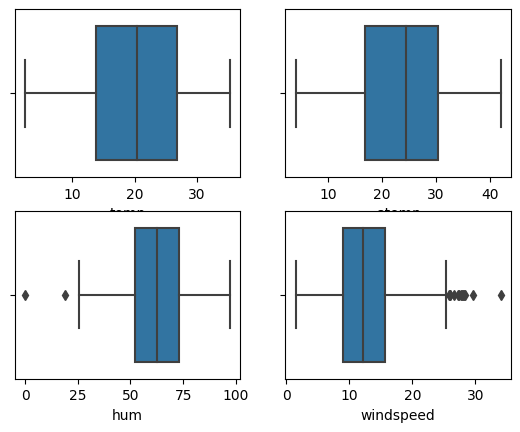

In [54]:
# Find the outliers in temp, atemp, hum, windspeed

plt.subplot(2,2, 1)
sns.boxplot(x=bike_sharing_data['temp'])
plt.subplot(2,2, 2)
sns.boxplot(x=bike_sharing_data['atemp'])
plt.subplot(2,2, 3)
sns.boxplot(x=bike_sharing_data['hum'])
plt.subplot(2,2, 4)
sns.boxplot(x=bike_sharing_data['windspeed'])

In [58]:
if bike_sharing_data['hum'].dtype!='O' and len(bike_sharing_data['hum'].unique()) > 2:
    lower_value = bike_sharing_data['hum'].quantile(0.25)
    upper_value = bike_sharing_data['hum'].quantile(0.75)
    median = bike_sharing_data['hum'].quantile(0.50)
    diff = upper_value - lower_value
    lower_fence = lower_value - (1.5 * diff)
    upper_fence = upper_value + (1.5 * diff)
    bike_sharing_data['hum'] = np.where(bike_sharing_data['hum'] > upper_fence, median, bike_sharing_data['hum'])
    bike_sharing_data['hum'] = np.where(bike_sharing_data['hum'] < lower_fence, median, bike_sharing_data['hum'])

if bike_sharing_data['windspeed'].dtype!='O' and len(bike_sharing_data['windspeed'].unique()) > 2:
    lower_value = bike_sharing_data['windspeed'].quantile(0.25)
    upper_value = bike_sharing_data['windspeed'].quantile(0.75)
    median = bike_sharing_data['windspeed'].quantile(0.50)
    diff = upper_value - lower_value
    lower_fence = lower_value - (1.5 * diff)
    upper_fence = upper_value + (1.5 * diff)
    bike_sharing_data['windspeed'] = np.where(bike_sharing_data['windspeed'] > upper_fence, median, bike_sharing_data['windspeed'])
    bike_sharing_data['windspeed'] = np.where(bike_sharing_data['windspeed'] < lower_fence, median, bike_sharing_data['windspeed'])
    
    

<Axes: xlabel='windspeed'>

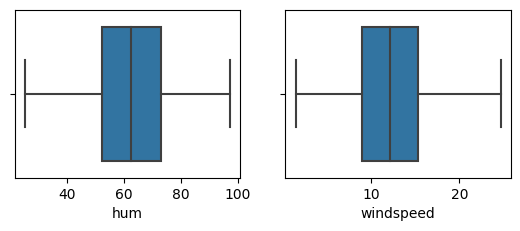

In [59]:
plt.subplot(2, 2, 1)
sns.boxplot(x = bike_sharing_data['hum'])
plt.subplot(2, 2, 2)
sns.boxplot(x=bike_sharing_data['windspeed'])

<ipython-input-66-db8da7dbacff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_sharing_data['temp'],rug = True)
<ipython-input-66-db8da7dbacff>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_sharing_data['hum'],rug = True)
<ipython-input-66-db8da7dbacff>:6: UserWarning: 

`distplot

<Axes: xlabel='windspeed', ylabel='Density'>

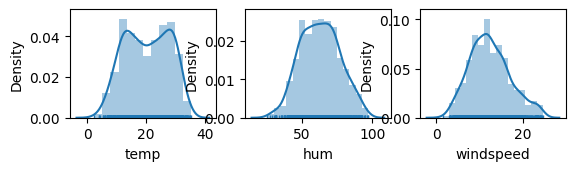

In [66]:
plt.subplot(3, 3, 1)
sns.distplot(bike_sharing_data['temp'],rug = True)
plt.subplot(3, 3, 2)
sns.distplot(bike_sharing_data['hum'],rug = True)
plt.subplot(3, 3, 3)
sns.distplot(bike_sharing_data['windspeed'],rug = True)

<Axes: xlabel='windspeed', ylabel='cnt'>

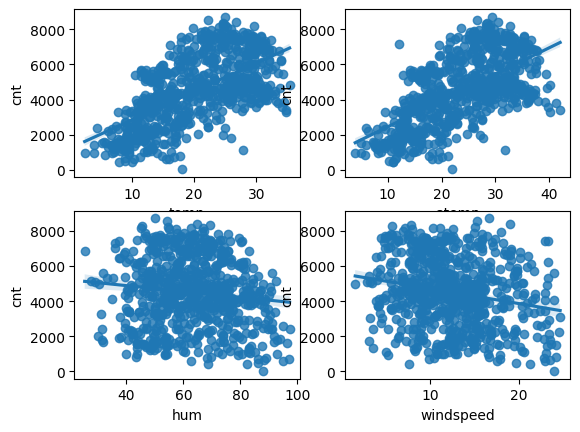

In [67]:
plt.subplot(2, 2, 1)
sns.regplot(x='temp', y="cnt", data=bike_sharing_data)
plt.subplot(2, 2, 2)
sns.regplot(x='atemp', y="cnt", data=bike_sharing_data)
plt.subplot(2, 2, 3)
sns.regplot(x='hum', y="cnt", data=bike_sharing_data)
plt.subplot(2, 2, 4)
sns.regplot(x='windspeed', y="cnt", data=bike_sharing_data)

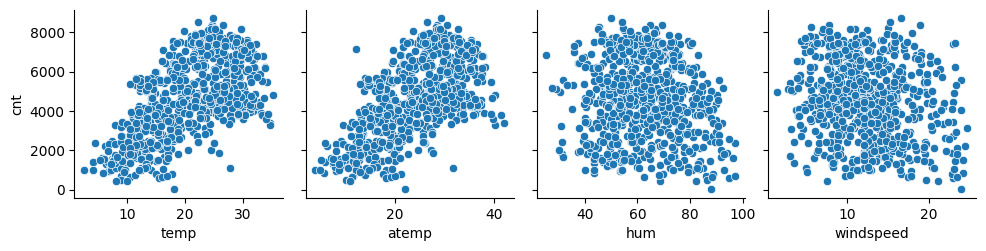

In [68]:
sns.pairplot(data=bike_sharing_data, x_vars=('temp', 'atemp', 'hum', 'windspeed'), y_vars=('cnt'))

<Axes: xlabel='season_name', ylabel='cnt'>

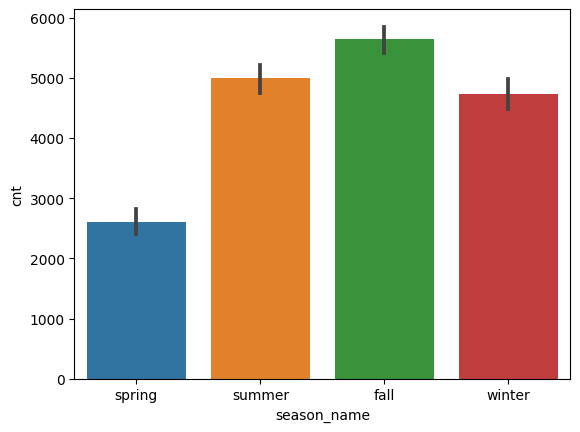

In [69]:
# Segmented analysis - seasons
sns.barplot(x=bike_sharing_data['season_name'], y='cnt', data=bike_sharing_data)

## Demand of bikes is higest during Fall season & lowest in spring

<Axes: xlabel='year_name', ylabel='cnt'>

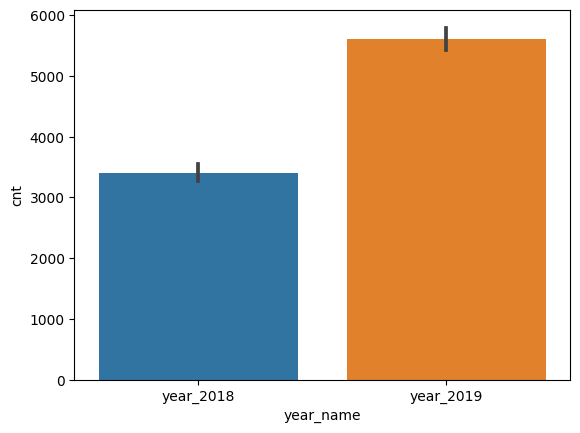

In [70]:
# Segmented analysis - year
sns.barplot(x=bike_sharing_data['year_name'], y='cnt', data=bike_sharing_data)

## Demand of shared bikes has increased from 2018 to 2019

<Axes: xlabel='month_name', ylabel='cnt'>

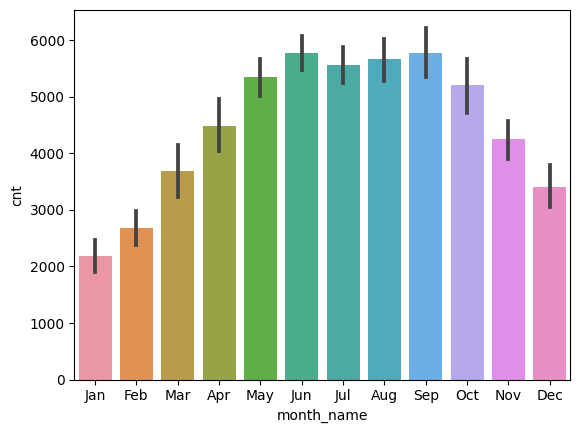

In [71]:
# Segmented analysis - month
sns.barplot(x=bike_sharing_data['month_name'], y='cnt', data=bike_sharing_data)

## In the month of Jan, the demand is lowest
## June to sept the demad is close to consistant

<Axes: xlabel='day_type', ylabel='cnt'>

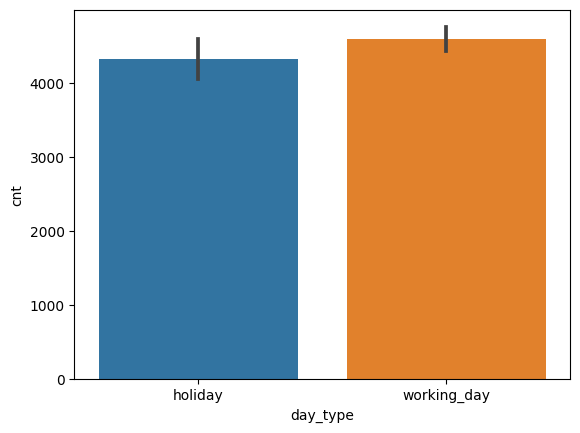

In [72]:
# Segmented analysis - Working or Holiday
sns.barplot(x=bike_sharing_data['day_type'], y='cnt', data=bike_sharing_data)

## On a working day, the demand is slightly higher. No drastic change in demand.

<ipython-input-81-790c0cae5111>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_sharing_data.corr(), annot=True)


<Axes: >

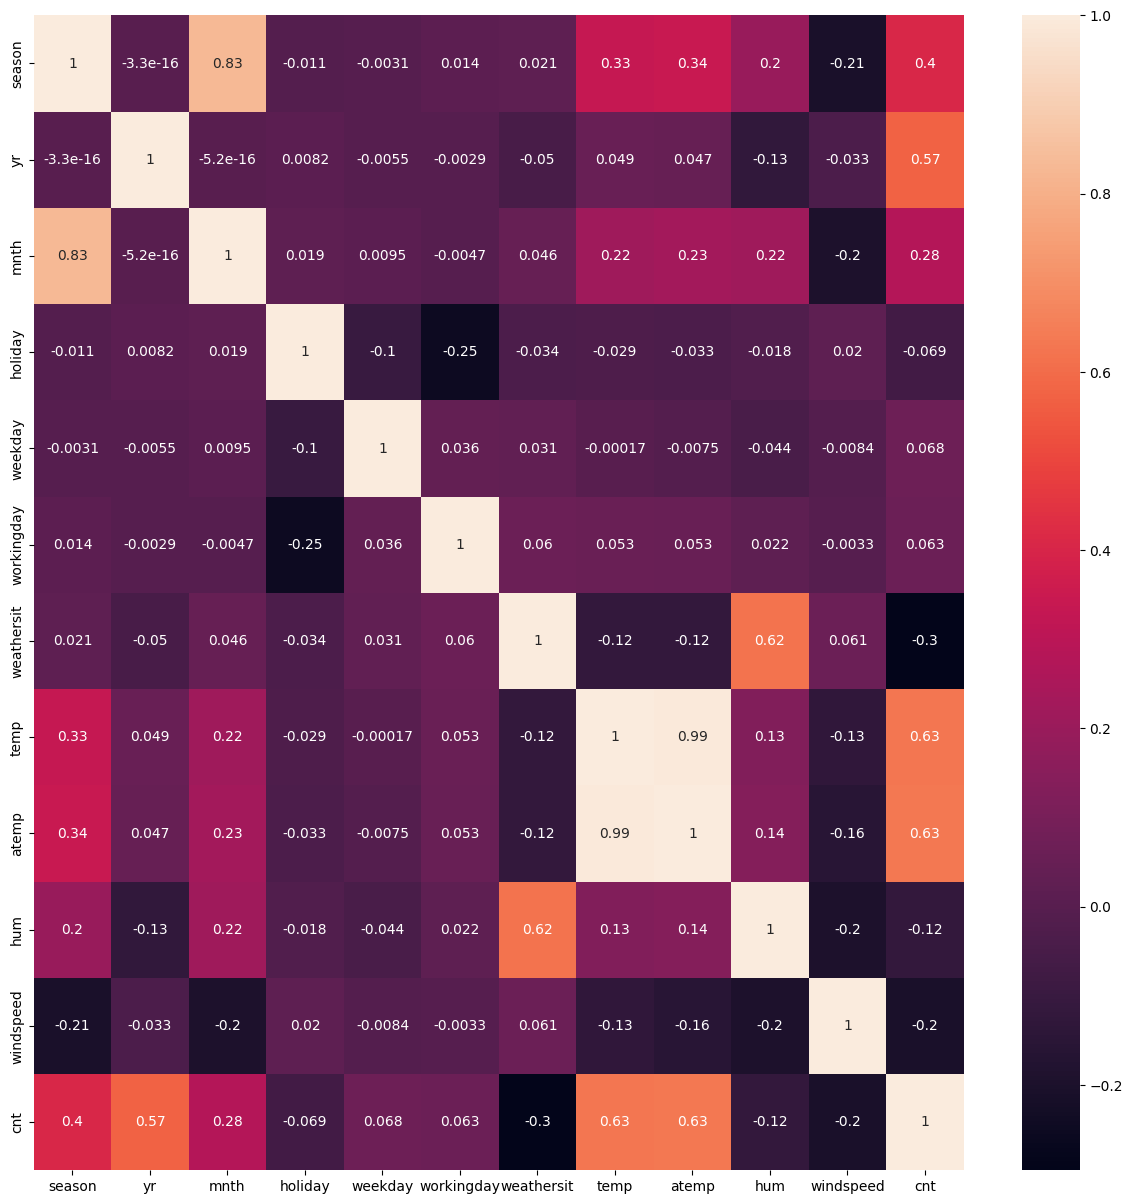

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(bike_sharing_data.corr(), annot=True)

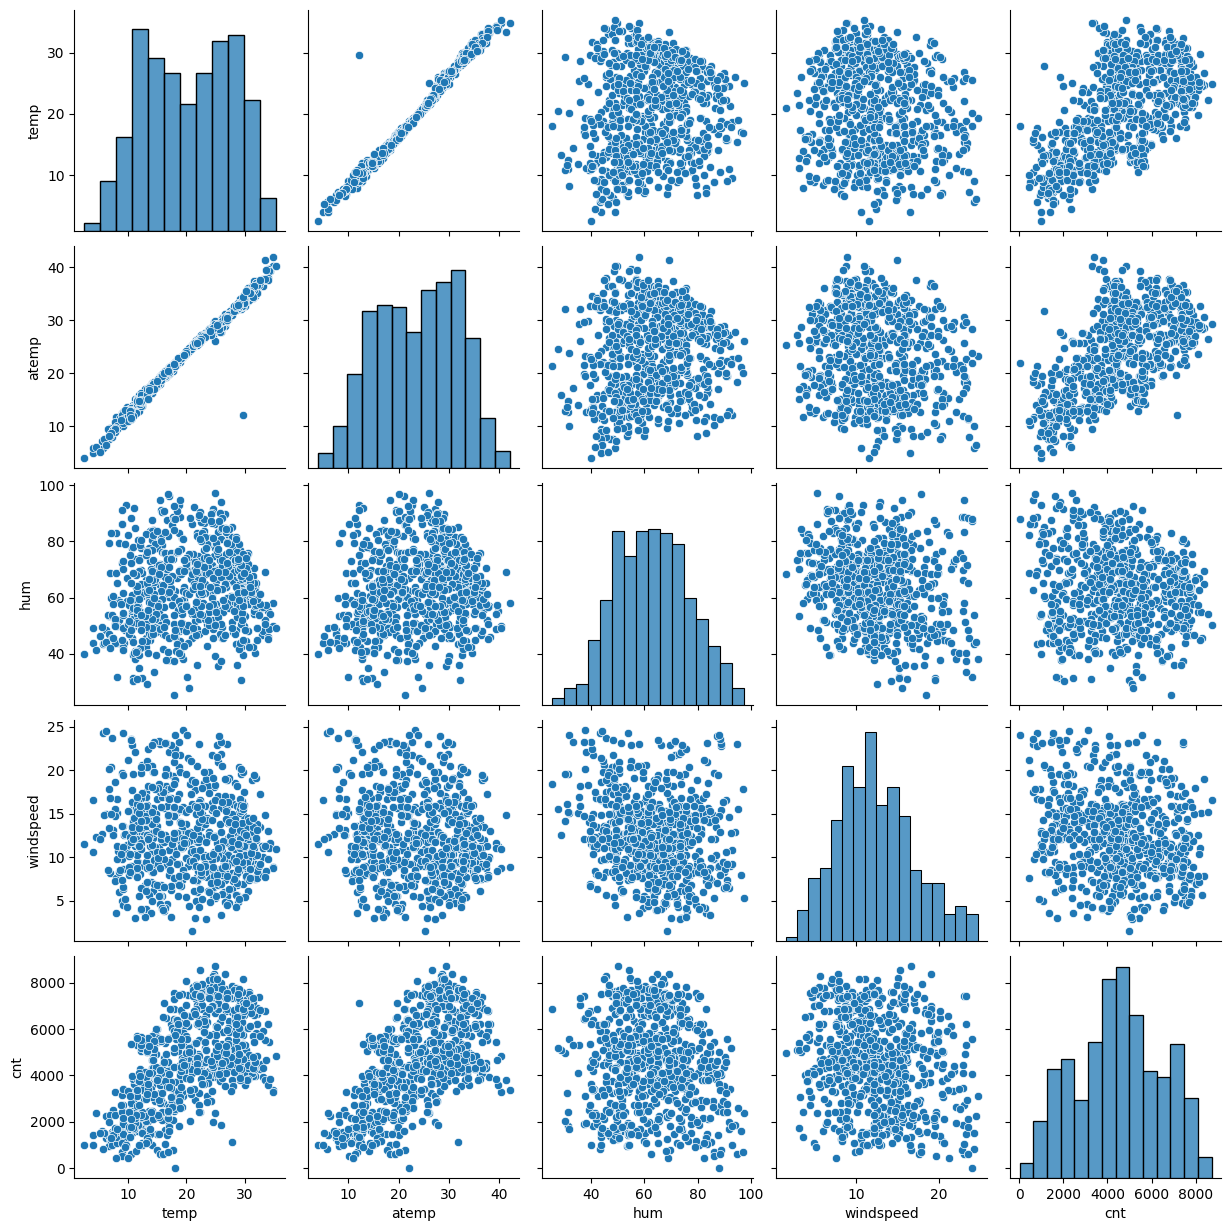

In [82]:
# Continuous Variables
continuos_variables = bike_sharing_data[['temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(continuos_variables)
plt.show()

*   There is strong Corelation between temp and count and atemp and count
*   There is negative corelation between
    * Count & humidity
    * Count & windspeed



In [85]:
modal_data = pd.get_dummies(bike_sharing_data, drop_first=True)
modal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   season                                                           730 non-null    int64  
 1   yr                                                               730 non-null    int64  
 2   mnth                                                             730 non-null    int64  
 3   holiday                                                          730 non-null    int64  
 4   weekday                                                          730 non-null    int64  
 5   workingday                                                       730 non-null    int64  
 6   weathersit                                                       730 non-null    int64  
 7   temp                                        

In [86]:
from sklearn.model_selection import train_test_split

In [201]:
X = bike_sharing_data[['temp', 'hum', 'windspeed', 'atemp']]
# X = bike_sharing_data['temp']
y = bike_sharing_data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state=100)

In [202]:
X_train.shape

(584, 4)

In [203]:
y_test.shape

(146,)

## Training the model

In [163]:
import statsmodels.api as sm

In [204]:
X_train_sm = sm.add_constant(X_train)
# y_train_sm = sm.add_constant(y_train)

In [205]:
# X_train_sm.shape
lr = sm.OLS(y_train, X_train_sm)

In [206]:
lr_model = lr.fit()

In [207]:
lr_model.params

const        3571.132732
temp           45.112364
hum           -31.587077
windspeed     -63.174118
atemp         119.439756
dtype: float64

In [208]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.71e-81
Time:                        21:34:07   Log-Likelihood:                -5062.8
No. Observations:                 584   AIC:                         1.014e+04
Df Residuals:                     579   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3571.1327    401.118      8.903      0.000    2783.309    4358.956
temp          45.1124     58.381      0.773      0.440     -69.552     159.777
hum          -31.5871      4.451     -7.097      0.000     -40.329     -22.845
windspeed    -63.1741     13.234     -4.773      0.000     -89.168     -37.181
atemp        119.4398     54.019      2.211      0.027      13.342     225.538
==============================================================================
Omnibus:                        6.174   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.892
Skew:                           0.123   Prob(JB):                       0.0866
Kurtosis:                       2.626   Cond. No.                         499.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

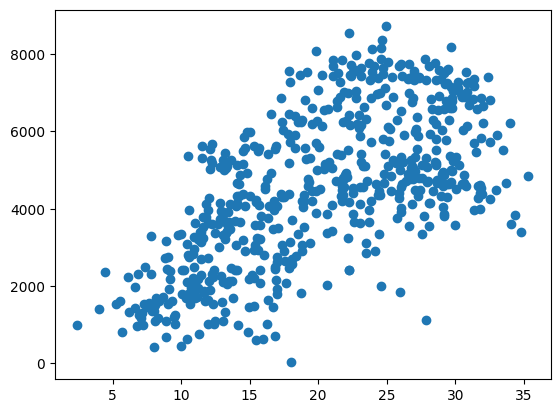

In [210]:
plt.scatter(X_train['temp'], y_train)

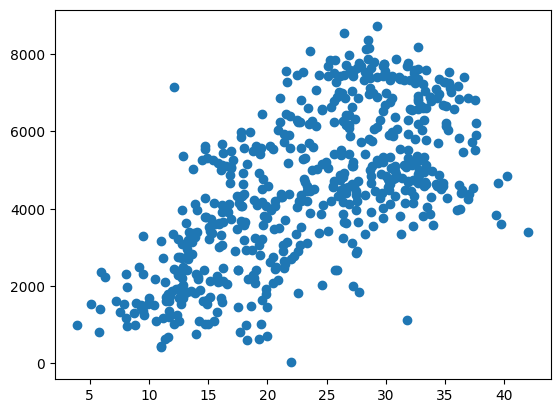

In [147]:
plt.scatter(X_train['atemp'], y_train)

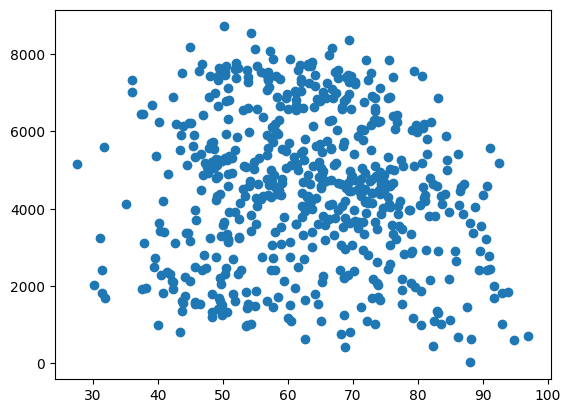

In [148]:
plt.scatter(X_train['hum'], y_train)

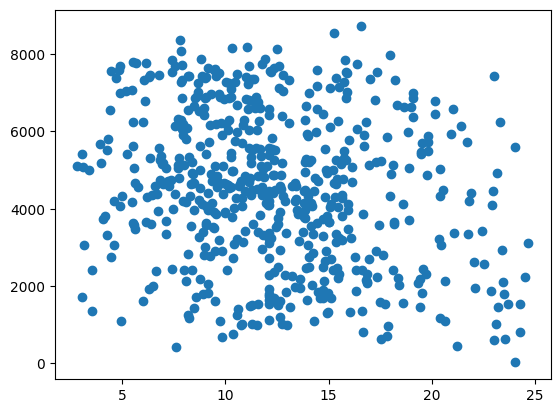

In [149]:
plt.scatter(X_train['windspeed'], y_train)

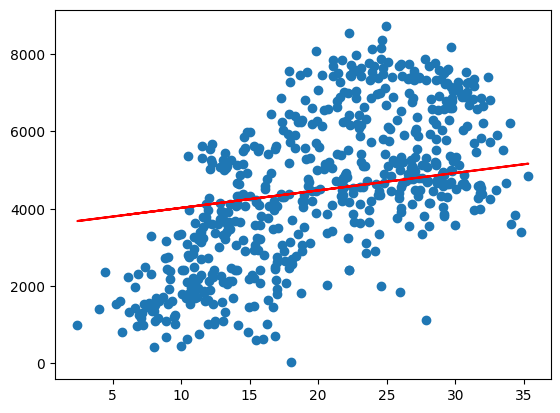

In [221]:
plt.scatter(X_train['temp'], y_train)
plt.plot(X_train['temp'], 3571.1327 + 45.1124 * X_train['temp'], 'r')
plt.show()

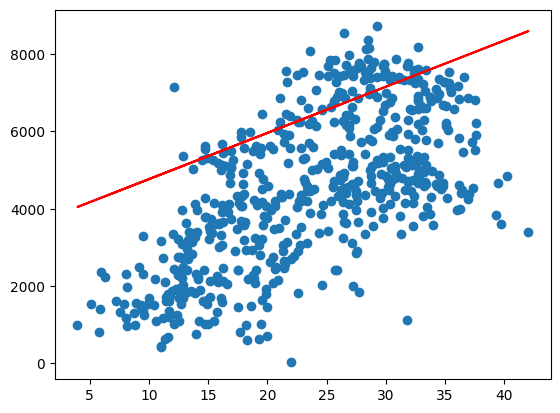

In [222]:
plt.scatter(X_train['atemp'], y_train)
plt.plot(X_train['atemp'], 3571.1327 + 119.4398 * X_train['atemp'], 'r')
plt.show()

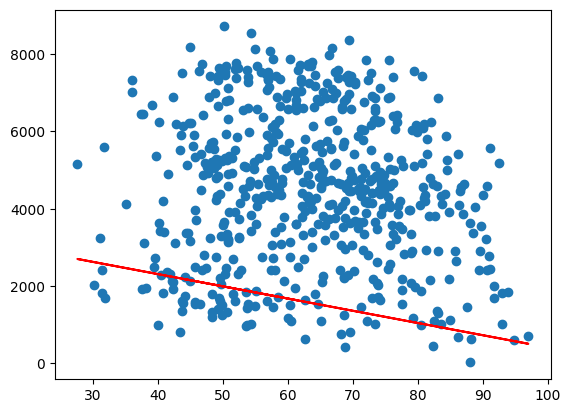

In [223]:
plt.scatter(X_train['hum'], y_train)
plt.plot(X_train['hum'], 3571.1327 + -31.5871 * X_train['hum'], 'r')
plt.show()

In [226]:
X_train.describe()

,count,mean,std,min,25%,50%,75%,max
temp,584.0,20.107433,7.414450,2.424346,13.615413,20.363326,26.658538,35.328347
hum,584.0,63.210749,13.625817,27.583300,52.239575,63.437500,73.010425,97.041700
windspeed,584.0,12.398591,4.658628,2.834381,9.041851,12.020905,15.333486,24.667189
atemp,584.0,23.500998,8.062524,3.953480,16.592913,24.163125,30.256325,42.044800


In [229]:
y_train.describe()

count     584.000000
mean     4505.267123
std      1958.617712
min        22.000000
25%      3070.250000
50%      4566.500000
75%      6035.750000
max      8714.000000
Name: cnt, dtype: float64